In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import the dataset
#Data Information: Chicco D. and Jurman G., “Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction
#alone”, BMC Medical Informatics and Decision Making, 2020, no. 16, doi: https://doi.org/10.1186/s12911-020-1023-5
data=pd.read_csv('/content/heart_failure_clinical_records_dataset.csv')

#Exploratory Data Analysis (EDA)

In [3]:
#Display top 10 rows of dataset
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [4]:
#Statistical Description of data
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
#Information of the attributes in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


60    35
50    27
65    26
70    25
45    19
55    17
75    11
58    10
53    10
63     8
42     7
40     7
72     7
80     7
85     6
52     5
68     5
62     5
49     4
61     4
59     4
73     4
51     4
64     3
46     3
69     3
82     3
90     3
66     2
78     2
54     2
77     2
57     2
44     2
67     2
95     2
48     2
43     1
86     1
81     1
79     1
41     1
94     1
87     1
47     1
56     1
Name: age, dtype: int64


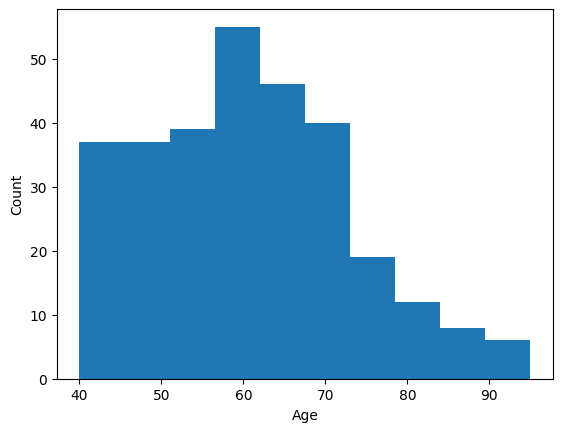

In [6]:
#Distribution of "age" attribute
print(data['age'].value_counts())
plt.hist(data['age'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

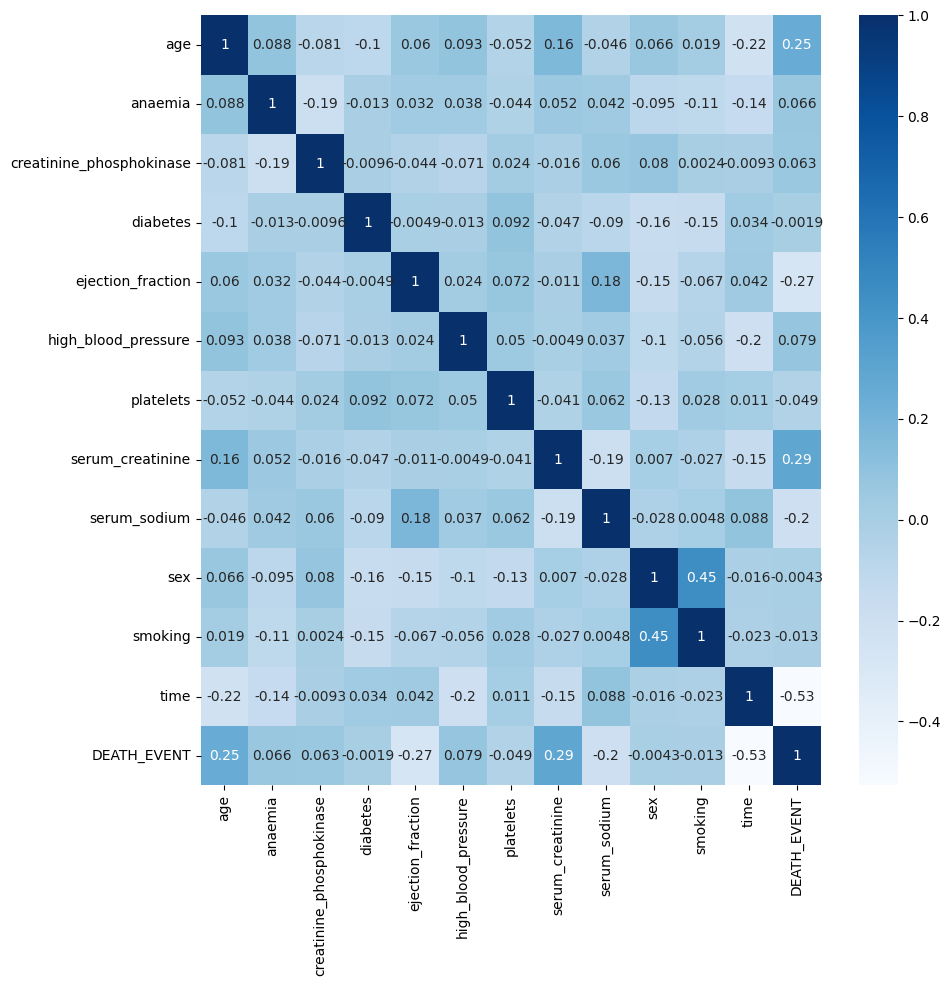

In [7]:
#Correlation map between the features
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot = True, cmap = "Blues")
plt.show()

In [8]:
#Correlation of the attributes with target "DEATH_EVENT"
data.corr()["DEATH_EVENT"].nlargest(len(data.columns))

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253581
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

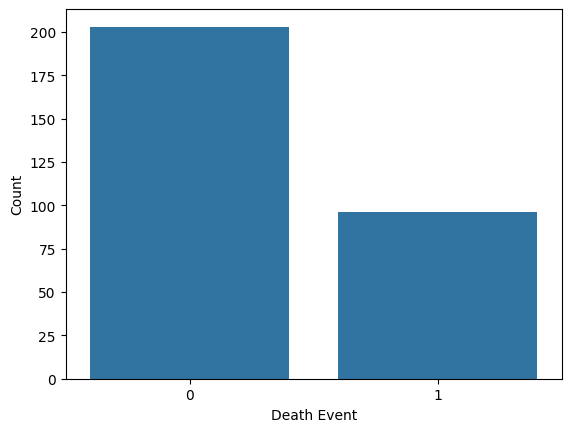

In [9]:
#Count Plot of count of DEATH_EVENT
sns.countplot(x="DEATH_EVENT",data=data)
plt.ylabel("Count")
plt.xlabel("Death Event")
plt.show()

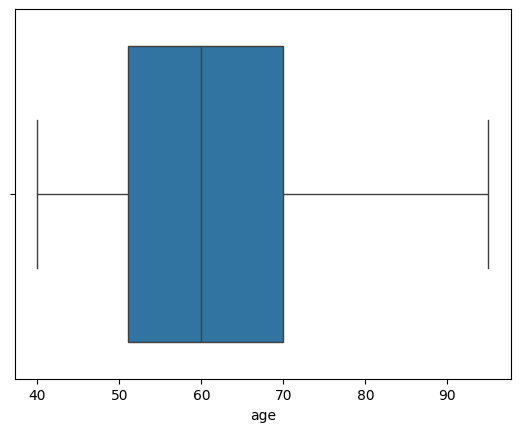

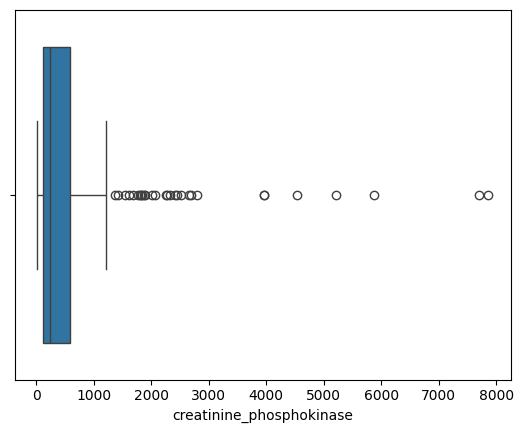

In [10]:
sns.boxplot(x='age',data=data)
plt.show()
sns.boxplot(x='creatinine_phosphokinase',data=data)
plt.show()

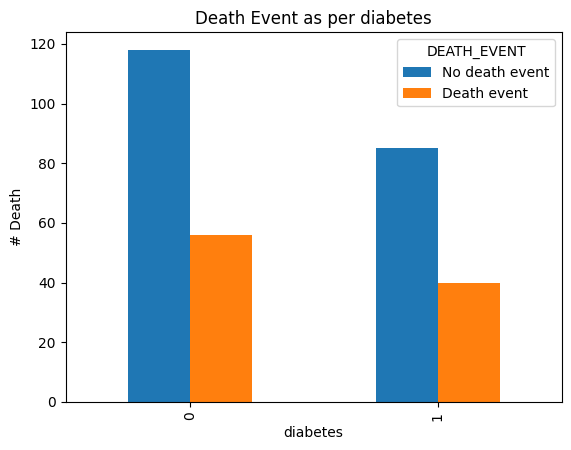

In [11]:
pd.crosstab(data.diabetes ,data.DEATH_EVENT).plot(kind='bar')
plt.legend(title='DEATH_EVENT', loc='upper right', labels=['No death event', 'Death event'])
plt.title('Death Event as per diabetes')
plt.xlabel('diabetes')
plt.ylabel('# Death')
plt.show()

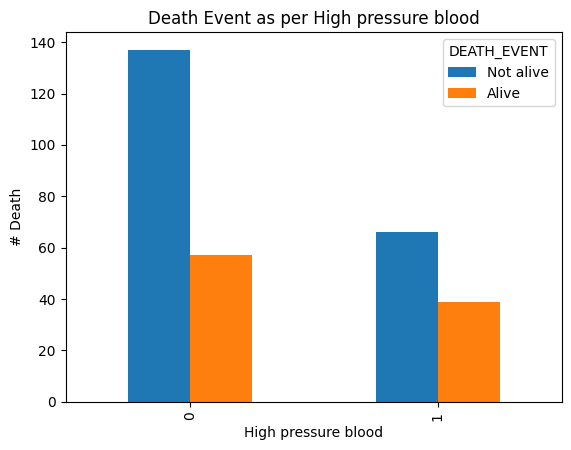

In [12]:
pd.crosstab(data.high_blood_pressure ,data.DEATH_EVENT).plot(kind='bar')
plt.legend(title='DEATH_EVENT', loc='upper right', labels=['Not alive', 'Alive'])
plt.title('Death Event as per High pressure blood')
plt.xlabel('High pressure blood')
plt.ylabel('# Death')
plt.show()

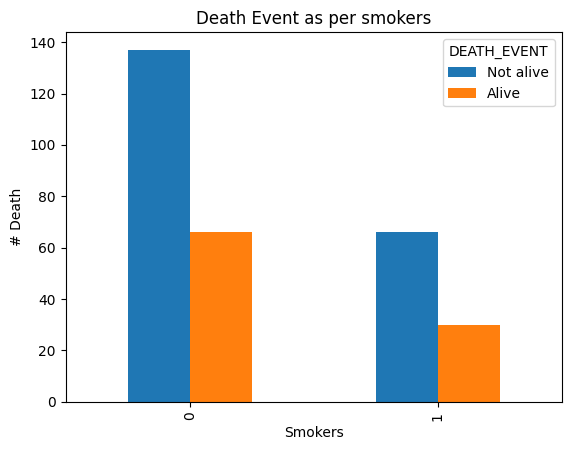

In [13]:
pd.crosstab(data.smoking ,data.DEATH_EVENT).plot(kind='bar')
plt.legend(title='DEATH_EVENT', loc='upper right', labels=['Not alive', 'Alive'])
plt.title('Death Event as per smokers')
plt.xlabel('Smokers')
plt.ylabel('# Death')
plt.show()

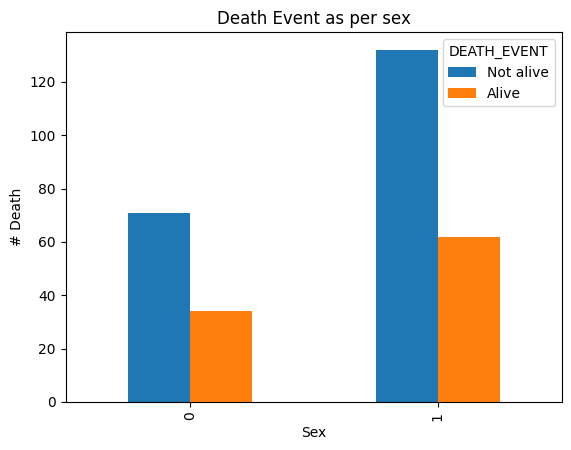

In [14]:
pd.crosstab(data.sex ,data.DEATH_EVENT).plot(kind='bar')
plt.legend(title='DEATH_EVENT', loc='upper right', labels=['Not alive', 'Alive'])
plt.title('Death Event as per sex')
plt.xlabel('Sex')
plt.ylabel('# Death')
plt.show()

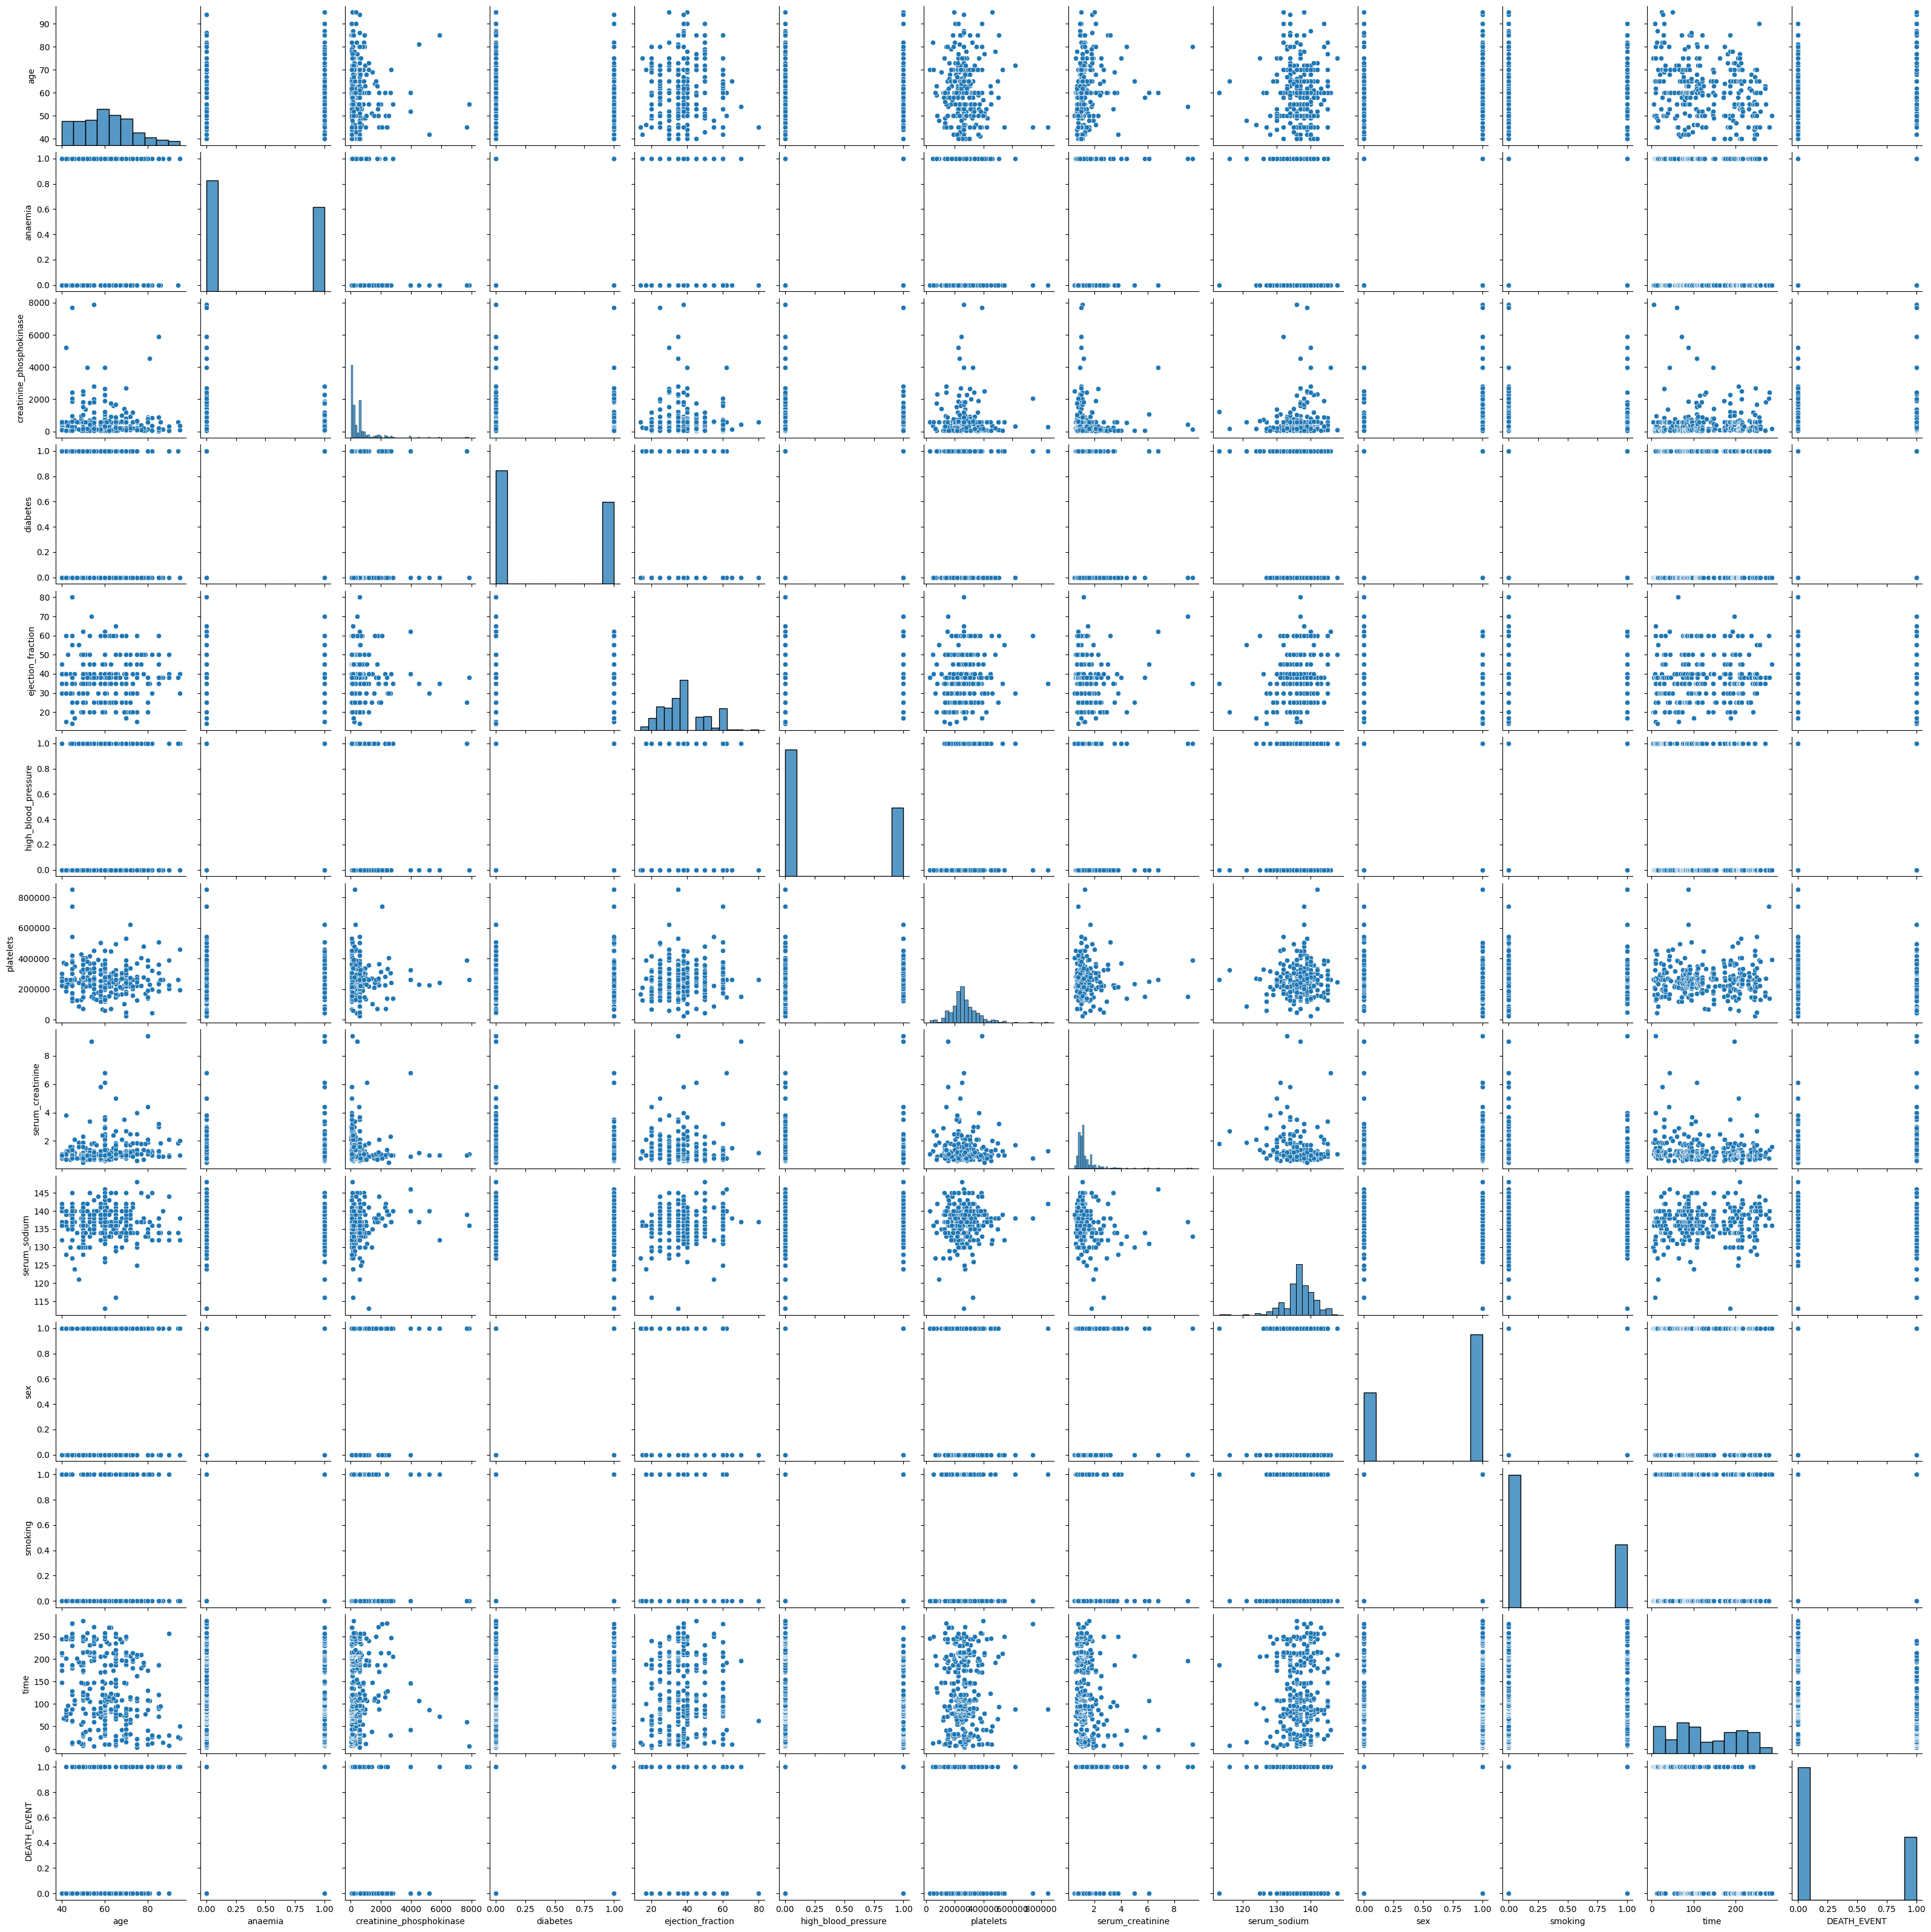

In [15]:
sns.pairplot(data)

# Building ML models on original imbalanced dataset

In [16]:
#Split the dataset into train and test set
from sklearn.model_selection import train_test_split

predictors = data.drop("DEATH_EVENT",axis=1)
target = data["DEATH_EVENT"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=42)

In [17]:
#Different ML models
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#Performance metrics
from sklearn.metrics import classification_report, roc_curve

In [18]:
lr = LogisticRegression(max_iter=150).fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
print(classification_report(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



In [19]:
nb = GaussianNB().fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)
print(classification_report(Y_test,Y_pred_nb))

              precision    recall  f1-score   support

           0       0.69      0.97      0.81        35
           1       0.91      0.40      0.56        25

    accuracy                           0.73        60
   macro avg       0.80      0.69      0.68        60
weighted avg       0.78      0.73      0.70        60



In [20]:
knn = KNeighborsClassifier().fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           0       0.57      0.86      0.68        35
           1       0.29      0.08      0.12        25

    accuracy                           0.53        60
   macro avg       0.43      0.47      0.40        60
weighted avg       0.45      0.53      0.45        60



In [21]:
dt = DecisionTreeClassifier().fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
print(classification_report(Y_test,Y_pred_dt))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        35
           1       0.69      0.44      0.54        25

    accuracy                           0.68        60
   macro avg       0.68      0.65      0.65        60
weighted avg       0.68      0.68      0.67        60



In [22]:
rf = RandomForestClassifier().fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79        35
           1       0.79      0.44      0.56        25

    accuracy                           0.72        60
   macro avg       0.74      0.68      0.68        60
weighted avg       0.73      0.72      0.70        60



In [23]:
gbc = GradientBoostingClassifier().fit(X_train, Y_train)
Y_pred_gbc = gbc.predict(X_test)
print(classification_report(Y_test,Y_pred_gbc))

              precision    recall  f1-score   support

           0       0.72      0.89      0.79        35
           1       0.76      0.52      0.62        25

    accuracy                           0.73        60
   macro avg       0.74      0.70      0.71        60
weighted avg       0.74      0.73      0.72        60



In [24]:
abc = AdaBoostClassifier().fit(X_train, Y_train)
Y_pred_abc = abc.predict(X_test)
print(classification_report(Y_test,Y_pred_abc))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.75      0.60      0.67        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.73        60
weighted avg       0.75      0.75      0.74        60



In [25]:
xgb = XGBClassifier().fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)
print(classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        35
           1       0.79      0.60      0.68        25

    accuracy                           0.77        60
   macro avg       0.77      0.74      0.75        60
weighted avg       0.77      0.77      0.76        60



In [26]:
lda = LinearDiscriminantAnalysis().fit(X_train, Y_train)
Y_pred_lda = lda.predict(X_test)
print(classification_report(Y_test,Y_pred_lda))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60



In [27]:
qda = QuadraticDiscriminantAnalysis().fit(X_train, Y_train)
Y_pred_qda = qda.predict(X_test)
print(classification_report(Y_test,Y_pred_qda))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76        35
           1       0.73      0.32      0.44        25

    accuracy                           0.67        60
   macro avg       0.69      0.62      0.60        60
weighted avg       0.68      0.67      0.63        60



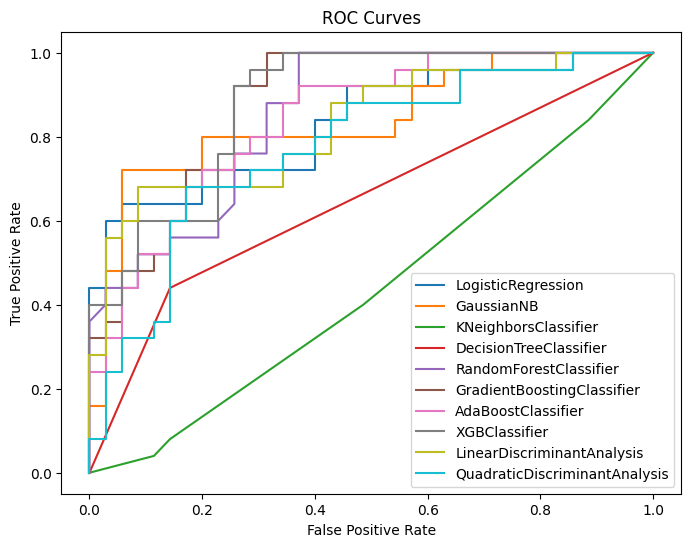

In [28]:
#ROC Curves of the ML models
plt.figure(figsize=(8,6))

y_pred_proba_lr = lr.predict_proba(X_test)[::,1]
lr_fpr, lr_tpr,_=roc_curve(Y_test,y_pred_proba_lr)
plt.plot(lr_fpr, lr_tpr,label="LogisticRegression")

y_pred_proba_nb = nb.predict_proba(X_test)[::,1]
nb_fpr, nb_tpr,_=roc_curve(Y_test,y_pred_proba_nb)
plt.plot(nb_fpr, nb_tpr,label="GaussianNB")

y_pred_proba_knn = knn.predict_proba(X_test)[::,1]
knn_fpr, knn_tpr,_=roc_curve(Y_test,y_pred_proba_knn)
plt.plot(knn_fpr, knn_tpr,label="KNeighborsClassifier")

y_pred_proba_dt = dt.predict_proba(X_test)[::,1]
dt_fpr, dt_tpr,_=roc_curve(Y_test,y_pred_proba_dt)
plt.plot(dt_fpr, dt_tpr,label="DecisionTreeClassifier")

y_pred_proba_rf = rf.predict_proba(X_test)[::,1]
rf_fpr, rf_tpr,_=roc_curve(Y_test,y_pred_proba_rf)
plt.plot(rf_fpr, rf_tpr,label="RandomForestClassifier")

y_pred_proba_gbc = gbc.predict_proba(X_test)[::,1]
gbc_fpr, gbc_tpr,_=roc_curve(Y_test,y_pred_proba_gbc)
plt.plot(gbc_fpr, gbc_tpr,label="GradientBoostingClassifier")

y_pred_proba_abc = abc.predict_proba(X_test)[::,1]
abc_fpr, abc_tpr,_=roc_curve(Y_test,y_pred_proba_abc)
plt.plot(abc_fpr, abc_tpr,label="AdaBoostClassifier")

y_pred_proba_xgb = xgb.predict_proba(X_test)[::,1]
xgb_fpr, xgb_tpr,_=roc_curve(Y_test,y_pred_proba_xgb)
plt.plot(xgb_fpr, xgb_tpr,label="XGBClassifier")

y_pred_proba_lda = lda.predict_proba(X_test)[::,1]
lda_fpr, lda_tpr,_=roc_curve(Y_test,y_pred_proba_lda)
plt.plot(lda_fpr, lda_tpr,label="LinearDiscriminantAnalysis")

y_pred_proba_qda = qda.predict_proba(X_test)[::,1]
qda_fpr, qda_tpr,_=roc_curve(Y_test,y_pred_proba_qda)
plt.plot(qda_fpr, qda_tpr,label="QuadraticDiscriminantAnalysis")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Building ML models on Synthetic Minority Oversampling Technique (SMOTE) balanced dataset

In [29]:
#SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=42)
SX_train, SY_train = smt.fit_resample(X_train, Y_train)
print(SY_train.value_counts())

1    168
0    168
Name: DEATH_EVENT, dtype: int64


In [30]:
lr = LogisticRegression(max_iter=150).fit(SX_train, SY_train)
Y_pred_lr = lr.predict(X_test)
print(classification_report(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        35
           1       0.67      0.64      0.65        25

    accuracy                           0.72        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.72      0.72      0.72        60



In [31]:
nb = GaussianNB().fit(SX_train, SY_train)
Y_pred_nb = nb.predict(X_test)
print(classification_report(Y_test,Y_pred_nb))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.77      0.68      0.72        25

    accuracy                           0.78        60
   macro avg       0.78      0.77      0.77        60
weighted avg       0.78      0.78      0.78        60



In [32]:
knn = KNeighborsClassifier().fit(SX_train, SY_train)
Y_pred_knn = knn.predict(X_test)
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56        35
           1       0.41      0.44      0.42        25

    accuracy                           0.50        60
   macro avg       0.49      0.49      0.49        60
weighted avg       0.51      0.50      0.50        60



In [33]:
dt = DecisionTreeClassifier().fit(SX_train, SY_train)
Y_pred_dt = dt.predict(X_test)
print(classification_report(Y_test,Y_pred_dt))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.74      0.68      0.71        25

    accuracy                           0.77        60
   macro avg       0.76      0.75      0.76        60
weighted avg       0.77      0.77      0.77        60



In [34]:
rf = RandomForestClassifier().fit(SX_train, SY_train)
Y_pred_rf = rf.predict(X_test)
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.84      0.64      0.73        25

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.78        60
weighted avg       0.81      0.80      0.79        60



In [35]:
gbc = GradientBoostingClassifier().fit(SX_train, SY_train)
Y_pred_gbc = gbc.predict(X_test)
print(classification_report(Y_test,Y_pred_gbc))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.75      0.60      0.67        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.73        60
weighted avg       0.75      0.75      0.74        60



In [36]:
abc = AdaBoostClassifier().fit(SX_train, SY_train)
Y_pred_abc = abc.predict(X_test)
print(classification_report(Y_test,Y_pred_abc))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        35
           1       0.74      0.56      0.64        25

    accuracy                           0.73        60
   macro avg       0.73      0.71      0.71        60
weighted avg       0.73      0.73      0.73        60



In [37]:
xgb = XGBClassifier().fit(SX_train, SY_train)
Y_pred_xgb = xgb.predict(X_test)
print(classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.74      0.91      0.82        35
           1       0.82      0.56      0.67        25

    accuracy                           0.77        60
   macro avg       0.78      0.74      0.74        60
weighted avg       0.78      0.77      0.76        60



In [38]:
lda = LinearDiscriminantAnalysis().fit(SX_train, SY_train)
Y_pred_lda = lda.predict(X_test)
print(classification_report(Y_test,Y_pred_lda))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        35
           1       0.83      0.60      0.70        25

    accuracy                           0.78        60
   macro avg       0.80      0.76      0.76        60
weighted avg       0.79      0.78      0.78        60



In [39]:
qda = QuadraticDiscriminantAnalysis().fit(SX_train, SY_train)
Y_pred_qda = qda.predict(X_test)
print(classification_report(Y_test,Y_pred_qda))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76        35
           1       0.69      0.36      0.47        25

    accuracy                           0.67        60
   macro avg       0.68      0.62      0.61        60
weighted avg       0.67      0.67      0.64        60



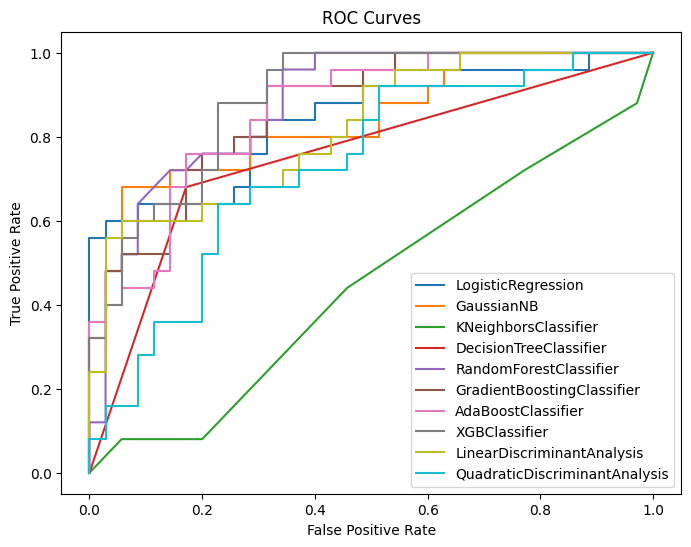

In [40]:
#ROC Curves of the ML models
plt.figure(figsize=(8,6))

y_pred_proba_lr = lr.predict_proba(X_test)[::,1]
lr_fpr, lr_tpr,_=roc_curve(Y_test,y_pred_proba_lr)
plt.plot(lr_fpr, lr_tpr,label="LogisticRegression")

y_pred_proba_nb = nb.predict_proba(X_test)[::,1]
nb_fpr, nb_tpr,_=roc_curve(Y_test,y_pred_proba_nb)
plt.plot(nb_fpr, nb_tpr,label="GaussianNB")

y_pred_proba_knn = knn.predict_proba(X_test)[::,1]
knn_fpr, knn_tpr,_=roc_curve(Y_test,y_pred_proba_knn)
plt.plot(knn_fpr, knn_tpr,label="KNeighborsClassifier")

y_pred_proba_dt = dt.predict_proba(X_test)[::,1]
dt_fpr, dt_tpr,_=roc_curve(Y_test,y_pred_proba_dt)
plt.plot(dt_fpr, dt_tpr,label="DecisionTreeClassifier")

y_pred_proba_rf = rf.predict_proba(X_test)[::,1]
rf_fpr, rf_tpr,_=roc_curve(Y_test,y_pred_proba_rf)
plt.plot(rf_fpr, rf_tpr,label="RandomForestClassifier")

y_pred_proba_gbc = gbc.predict_proba(X_test)[::,1]
gbc_fpr, gbc_tpr,_=roc_curve(Y_test,y_pred_proba_gbc)
plt.plot(gbc_fpr, gbc_tpr,label="GradientBoostingClassifier")

y_pred_proba_abc = abc.predict_proba(X_test)[::,1]
abc_fpr, abc_tpr,_=roc_curve(Y_test,y_pred_proba_abc)
plt.plot(abc_fpr, abc_tpr,label="AdaBoostClassifier")

y_pred_proba_xgb = xgb.predict_proba(X_test)[::,1]
xgb_fpr, xgb_tpr,_=roc_curve(Y_test,y_pred_proba_xgb)
plt.plot(xgb_fpr, xgb_tpr,label="XGBClassifier")

y_pred_proba_lda = lda.predict_proba(X_test)[::,1]
lda_fpr, lda_tpr,_=roc_curve(Y_test,y_pred_proba_lda)
plt.plot(lda_fpr, lda_tpr,label="LinearDiscriminantAnalysis")

y_pred_proba_qda = qda.predict_proba(X_test)[::,1]
qda_fpr, qda_tpr,_=roc_curve(Y_test,y_pred_proba_qda)
plt.plot(qda_fpr, qda_tpr,label="QuadraticDiscriminantAnalysis")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Feature Selection using Recursive Feature Elimination (RFE)

In [41]:
#RFE
from sklearn.feature_selection import RFE
rfe_lr = RFE(estimator = LogisticRegression(max_iter=600)).fit(SX_train,SY_train)
rfe_dt = RFE(estimator = DecisionTreeClassifier()).fit(SX_train,SY_train)
rfe_rf = RFE(estimator = RandomForestClassifier()).fit(SX_train,SY_train)
rfe_gbc = RFE(estimator = GradientBoostingClassifier()).fit(SX_train,SY_train)
rfe_abc = RFE(estimator = AdaBoostClassifier()).fit(SX_train,SY_train)
rfe_xgb = RFE(estimator = XGBClassifier()).fit(SX_train,SY_train)

In [42]:
ranking = {'Features': SX_train.columns.values, 'LogisticRegression_Ranking': rfe_lr.ranking_, 'DecisionTree_Ranking': rfe_dt.ranking_,
        'RandomForest_Ranking': rfe_rf.ranking_, 'GradientBoosting_Ranking': rfe_gbc.ranking_, 'AdaBoost_Ranking': rfe_abc.ranking_,
        'XGBoost_Ranking': rfe_xgb.ranking_}
feat_rank = pd.DataFrame(ranking)
feat_rank

,Features,LogisticRegression_Ranking,DecisionTree_Ranking,RandomForest_Ranking,GradientBoosting_Ranking,AdaBoost_Ranking,XGBoost_Ranking
0,age,2,2,1,2,1,5
1,anaemia,1,7,5,5,5,1
2,creatinine_phosphokinase,6,1,1,1,1,4
3,diabetes,5,3,6,6,4,7
4,ejection_fraction,1,1,1,1,1,1
5,high_blood_pressure,1,6,7,7,7,3
6,platelets,7,1,1,1,1,6
7,serum_creatinine,1,1,1,1,1,1
8,serum_sodium,3,1,2,1,3,2
9,sex,1,5,3,4,2,1




*   **Seven selected features using RFE:**
1. **Age**
2. **creatinine_phosphokinase**
3. **ejection_fraction**
4. **platelets**
5. **serum_creatinine**
6. **serum_sodium**
7. **time**



# Building ML models on imbalanced balanced dataset with selected features

In [43]:
X = data.drop(["high_blood_pressure","anaemia","diabetes","sex","smoking","DEATH_EVENT"],axis=1)
Y = data.DEATH_EVENT

In [44]:
#Splitting original dataset with top 7 features
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [45]:
lr = LogisticRegression(max_iter=150).fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
print(classification_report(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



In [46]:
nb = GaussianNB().fit(X_train, Y_train)
Y_pred_nb = nb.predict(X_test)
print(classification_report(Y_test,Y_pred_nb))

              precision    recall  f1-score   support

           0       0.69      0.97      0.81        35
           1       0.91      0.40      0.56        25

    accuracy                           0.73        60
   macro avg       0.80      0.69      0.68        60
weighted avg       0.78      0.73      0.70        60



In [47]:
knn = KNeighborsClassifier().fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           0       0.57      0.86      0.68        35
           1       0.29      0.08      0.12        25

    accuracy                           0.53        60
   macro avg       0.43      0.47      0.40        60
weighted avg       0.45      0.53      0.45        60



In [48]:
dt = DecisionTreeClassifier().fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
print(classification_report(Y_test,Y_pred_dt))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        35
           1       0.67      0.56      0.61        25

    accuracy                           0.70        60
   macro avg       0.69      0.68      0.68        60
weighted avg       0.70      0.70      0.70        60



In [49]:
rf = RandomForestClassifier().fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.72      0.89      0.79        35
           1       0.76      0.52      0.62        25

    accuracy                           0.73        60
   macro avg       0.74      0.70      0.71        60
weighted avg       0.74      0.73      0.72        60



In [50]:
gbc = GradientBoostingClassifier().fit(X_train, Y_train)
Y_pred_gbc = gbc.predict(X_test)
print(classification_report(Y_test,Y_pred_gbc))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81        35
           1       0.78      0.56      0.65        25

    accuracy                           0.75        60
   macro avg       0.76      0.72      0.73        60
weighted avg       0.75      0.75      0.74        60



In [51]:
abc = AdaBoostClassifier().fit(X_train, Y_train)
Y_pred_abc = abc.predict(X_test)
print(classification_report(Y_test,Y_pred_abc))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        35
           1       0.75      0.60      0.67        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.73        60
weighted avg       0.75      0.75      0.74        60



In [52]:
xgb = XGBClassifier().fit(X_train, Y_train)
Y_pred_xgb = xgb.predict(X_test)
print(classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77        35
           1       0.70      0.56      0.62        25

    accuracy                           0.72        60
   macro avg       0.71      0.69      0.70        60
weighted avg       0.71      0.72      0.71        60



In [53]:
lda = LinearDiscriminantAnalysis().fit(X_train, Y_train)
Y_pred_lda = lda.predict(X_test)
print(classification_report(Y_test,Y_pred_lda))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84        35
           1       0.88      0.56      0.68        25

    accuracy                           0.78        60
   macro avg       0.81      0.75      0.76        60
weighted avg       0.80      0.78      0.77        60



In [54]:
qda = QuadraticDiscriminantAnalysis().fit(X_train, Y_train)
Y_pred_qda = qda.predict(X_test)
print(classification_report(Y_test,Y_pred_qda))

              precision    recall  f1-score   support

           0       0.67      0.94      0.79        35
           1       0.82      0.36      0.50        25

    accuracy                           0.70        60
   macro avg       0.75      0.65      0.64        60
weighted avg       0.73      0.70      0.67        60



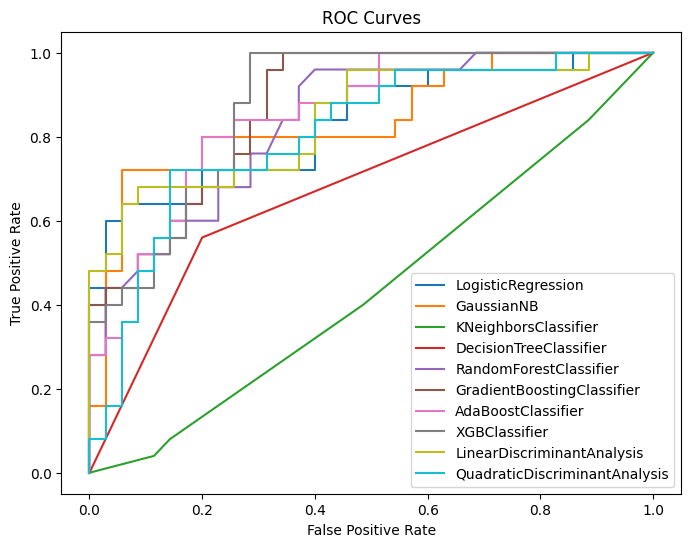

In [55]:
#ROC Curves of the ML models
plt.figure(figsize=(8,6))

y_pred_proba_lr = lr.predict_proba(X_test)[::,1]
lr_fpr, lr_tpr,_=roc_curve(Y_test,y_pred_proba_lr)
plt.plot(lr_fpr, lr_tpr,label="LogisticRegression")

y_pred_proba_nb = nb.predict_proba(X_test)[::,1]
nb_fpr, nb_tpr,_=roc_curve(Y_test,y_pred_proba_nb)
plt.plot(nb_fpr, nb_tpr,label="GaussianNB")

y_pred_proba_knn = knn.predict_proba(X_test)[::,1]
knn_fpr, knn_tpr,_=roc_curve(Y_test,y_pred_proba_knn)
plt.plot(knn_fpr, knn_tpr,label="KNeighborsClassifier")

y_pred_proba_dt = dt.predict_proba(X_test)[::,1]
dt_fpr, dt_tpr,_=roc_curve(Y_test,y_pred_proba_dt)
plt.plot(dt_fpr, dt_tpr,label="DecisionTreeClassifier")

y_pred_proba_rf = rf.predict_proba(X_test)[::,1]
rf_fpr, rf_tpr,_=roc_curve(Y_test,y_pred_proba_rf)
plt.plot(rf_fpr, rf_tpr,label="RandomForestClassifier")

y_pred_proba_gbc = gbc.predict_proba(X_test)[::,1]
gbc_fpr, gbc_tpr,_=roc_curve(Y_test,y_pred_proba_gbc)
plt.plot(gbc_fpr, gbc_tpr,label="GradientBoostingClassifier")

y_pred_proba_abc = abc.predict_proba(X_test)[::,1]
abc_fpr, abc_tpr,_=roc_curve(Y_test,y_pred_proba_abc)
plt.plot(abc_fpr, abc_tpr,label="AdaBoostClassifier")

y_pred_proba_xgb = xgb.predict_proba(X_test)[::,1]
xgb_fpr, xgb_tpr,_=roc_curve(Y_test,y_pred_proba_xgb)
plt.plot(xgb_fpr, xgb_tpr,label="XGBClassifier")

y_pred_proba_lda = lda.predict_proba(X_test)[::,1]
lda_fpr, lda_tpr,_=roc_curve(Y_test,y_pred_proba_lda)
plt.plot(lda_fpr, lda_tpr,label="LinearDiscriminantAnalysis")

y_pred_proba_qda = qda.predict_proba(X_test)[::,1]
qda_fpr, qda_tpr,_=roc_curve(Y_test,y_pred_proba_qda)
plt.plot(qda_fpr, qda_tpr,label="QuadraticDiscriminantAnalysis")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# Building ML models on SMOTE balanced dataset with selected features

In [56]:
smt = SMOTE(random_state=42)
SX, SY = smt.fit_resample(X_train, Y_train)

In [57]:
lr = LogisticRegression(max_iter=150).fit(SX, SY)
Y_pred_lr = lr.predict(X_test)
print(classification_report(Y_test,Y_pred_lr))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        35
           1       0.67      0.64      0.65        25

    accuracy                           0.72        60
   macro avg       0.71      0.71      0.71        60
weighted avg       0.72      0.72      0.72        60



In [58]:
nb = GaussianNB().fit(SX, SY)
Y_pred_nb = nb.predict(X_test)
print(classification_report(Y_test,Y_pred_nb))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        35
           1       0.77      0.68      0.72        25

    accuracy                           0.78        60
   macro avg       0.78      0.77      0.77        60
weighted avg       0.78      0.78      0.78        60



In [59]:
knn = KNeighborsClassifier().fit(SX, SY)
Y_pred_knn = knn.predict(X_test)
print(classification_report(Y_test,Y_pred_knn))

              precision    recall  f1-score   support

           0       0.58      0.54      0.56        35
           1       0.41      0.44      0.42        25

    accuracy                           0.50        60
   macro avg       0.49      0.49      0.49        60
weighted avg       0.51      0.50      0.50        60



In [60]:
dt = DecisionTreeClassifier().fit(SX, SY)
Y_pred_dt = dt.predict(X_test)
print(classification_report(Y_test,Y_pred_dt))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.68      0.60      0.64        25

    accuracy                           0.72        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.71      0.72      0.71        60



In [61]:
rf = RandomForestClassifier().fit(SX, SY)
Y_pred_rf = rf.predict(X_test)
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        35
           1       0.70      0.64      0.67        25

    accuracy                           0.73        60
   macro avg       0.73      0.72      0.72        60
weighted avg       0.73      0.73      0.73        60



In [62]:
gbc = GradientBoostingClassifier().fit(SX, SY)
Y_pred_gbc = gbc.predict(X_test)
print(classification_report(Y_test,Y_pred_gbc))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.68      0.60      0.64        25

    accuracy                           0.72        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.71      0.72      0.71        60



In [63]:
abc = AdaBoostClassifier().fit(SX, SY)
Y_pred_abc = abc.predict(X_test)
print(classification_report(Y_test,Y_pred_abc))

              precision    recall  f1-score   support

           0       0.74      0.83      0.78        35
           1       0.71      0.60      0.65        25

    accuracy                           0.73        60
   macro avg       0.73      0.71      0.72        60
weighted avg       0.73      0.73      0.73        60



In [64]:
xgb = XGBClassifier().fit(SX, SY)
Y_pred_xgb = xgb.predict(X_test)
print(classification_report(Y_test,Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81        35
           1       0.74      0.68      0.71        25

    accuracy                           0.77        60
   macro avg       0.76      0.75      0.76        60
weighted avg       0.77      0.77      0.77        60



In [65]:
lda = LinearDiscriminantAnalysis().fit(SX, SY)
Y_pred_lda = lda.predict(X_test)
print(classification_report(Y_test,Y_pred_lda))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.73      0.64      0.68        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.74        60
weighted avg       0.75      0.75      0.75        60



In [66]:
qda = QuadraticDiscriminantAnalysis().fit(SX, SY)
Y_pred_qda = qda.predict(X_test)
print(classification_report(Y_test,Y_pred_qda))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        35
           1       0.79      0.60      0.68        25

    accuracy                           0.77        60
   macro avg       0.77      0.74      0.75        60
weighted avg       0.77      0.77      0.76        60



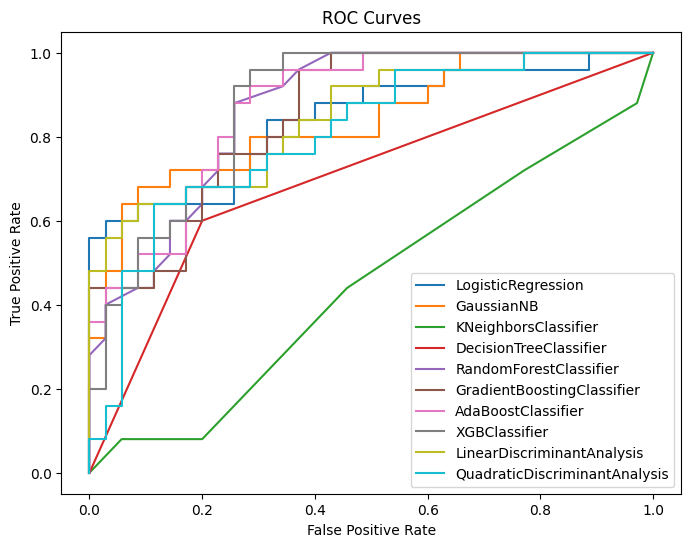

In [67]:
#ROC Curves of the ML models
plt.figure(figsize=(8,6))

y_pred_proba_lr = lr.predict_proba(X_test)[::,1]
lr_fpr, lr_tpr,_=roc_curve(Y_test,y_pred_proba_lr)
plt.plot(lr_fpr, lr_tpr,label="LogisticRegression")

y_pred_proba_nb = nb.predict_proba(X_test)[::,1]
nb_fpr, nb_tpr,_=roc_curve(Y_test,y_pred_proba_nb)
plt.plot(nb_fpr, nb_tpr,label="GaussianNB")

y_pred_proba_knn = knn.predict_proba(X_test)[::,1]
knn_fpr, knn_tpr,_=roc_curve(Y_test,y_pred_proba_knn)
plt.plot(knn_fpr, knn_tpr,label="KNeighborsClassifier")

y_pred_proba_dt = dt.predict_proba(X_test)[::,1]
dt_fpr, dt_tpr,_=roc_curve(Y_test,y_pred_proba_dt)
plt.plot(dt_fpr, dt_tpr,label="DecisionTreeClassifier")

y_pred_proba_rf = rf.predict_proba(X_test)[::,1]
rf_fpr, rf_tpr,_=roc_curve(Y_test,y_pred_proba_rf)
plt.plot(rf_fpr, rf_tpr,label="RandomForestClassifier")

y_pred_proba_gbc = gbc.predict_proba(X_test)[::,1]
gbc_fpr, gbc_tpr,_=roc_curve(Y_test,y_pred_proba_gbc)
plt.plot(gbc_fpr, gbc_tpr,label="GradientBoostingClassifier")

y_pred_proba_abc = abc.predict_proba(X_test)[::,1]
abc_fpr, abc_tpr,_=roc_curve(Y_test,y_pred_proba_abc)
plt.plot(abc_fpr, abc_tpr,label="AdaBoostClassifier")

y_pred_proba_xgb = xgb.predict_proba(X_test)[::,1]
xgb_fpr, xgb_tpr,_=roc_curve(Y_test,y_pred_proba_xgb)
plt.plot(xgb_fpr, xgb_tpr,label="XGBClassifier")

y_pred_proba_lda = lda.predict_proba(X_test)[::,1]
lda_fpr, lda_tpr,_=roc_curve(Y_test,y_pred_proba_lda)
plt.plot(lda_fpr, lda_tpr,label="LinearDiscriminantAnalysis")

y_pred_proba_qda = qda.predict_proba(X_test)[::,1]
qda_fpr, qda_tpr,_=roc_curve(Y_test,y_pred_proba_qda)
plt.plot(qda_fpr, qda_tpr,label="QuadraticDiscriminantAnalysis")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()